In [1]:
## Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import os

In [2]:
## Change Data Path in order to Read in data from local CSVs
os.chdir(str(Path(os.getcwd()).parent / 'Data'))

# Data ARD _CoC Annual Renewal Demand (ARD) & Preliminary Pro Rata Need (PPRN)_

  - 4 DataFrames
      - ard_coc_codes
      - ard_full
      - ard_aggregates
      - ard_all_years

## ard_coc_codes

In [3]:
ard_coc_codes = pd.read_csv('ard_coc_codes.csv')
ard_coc_codes.head(20)

,year,coc_number,coc_name
0,2012,AK-500,Anchorage
1,2013,AK-500,Anchorage
2,2014,AK-500,Anchorage
3,2015,AK-500,Anchorage
4,2016,AK-500,Anchorage
5,2017,AK-500,Anchorage
6,2018,AK-500,Anchorage
7,2019,AK-500,Anchorage
8,2012,AK-501,Alaska Balance of State
9,2013,AK-501,Alaska Balance of State


## ard_full

In [4]:
ard_full = pd.read_csv('ard_full.csv')
ard_full.head(20)

,year,coc_number,coc_number_and_name,pprn,estimated_ard,tier_1,bonus,dv_bonus,coc_planning
0,2019,AK-500,AK-500-ANCHORAGE,1264986,3784364,3610858.0,189218,126499.0,113531
1,2019,AK-501,AK-501-ALASKA BALANCE OF STATE,792338,790036,749696.0,39617,79234.0,23770
2,2019,AL-500,"AL-500-BIRMINGHAM,JEFFERSON,ST.CLAIR,SHELBY CO...",6587951,9223098,8676439.0,461155,658795.0,276693
3,2019,AL-501,"AL-501-MOBILE CITY & COUNTY,BALDWIN COUNTY",3110886,3699553,3477581.0,184978,311089.0,110987
4,2019,AL-502,"AL-502-FLORENCE,NORTHWEST ALABAMA",595732,419114,393968.0,44155,59573.0,17872
5,2019,AL-503,"AL-503-HUNTSVILLE,NORTH ALABAMA",942862,636987,598768.0,76469,94286.0,28286
6,2019,AL-504,AL-504-MONTGOMERY CITY & COUNTY,1623396,1196145,1127942.0,106813,162340.0,48702
7,2019,AL-506,AL-506-TUSCALOOSA CITY & COUNTY,400316,203299,191101.0,49254,50000.0,12009
8,2019,AL-507,AL-507-ALABAMA BALANCE OF STATE,3699879,1066686,1002685.0,658298,369988.0,110996
9,2019,AR-500,"AR-500-LITTLE ROCK,CENTRAL ARKANSAS",1680647,3076941,2892323.0,153847,168065.0,92308


In [5]:
ard_full.isnull().sum()

year                      0
coc_number                0
coc_number_and_name       0
pprn                      0
estimated_ard             0
tier_1                 1597
bonus                     0
dv_bonus               1203
coc_planning              0
dtype: int64

In [6]:
## Add State
ard_full['State'] = ard_full['coc_number'].apply(lambda x: x[:2])

In [7]:
## Sum of Monies By State (Aggregate for all years)
ard_full.groupby('State').sum().drop(columns = ['year']).sort_values(by=['pprn'], ascending= False)

,pprn,estimated_ard,tier_1,bonus,dv_bonus,coc_planning
State,,,,,,
CA,1057402181,1779778533,384526418.0,131657725,41630852.0,47476981
NY,918020427,982988952,202338351.0,79182320,25017425.0,23540383
TX,592880560,429475504,90799370.0,51455057,25209437.0,18597201
PA,500777470,491362758,98721574.0,38736942,21333423.0,15799531
IL,446216166,523132768,106347386.0,39686034,17582135.0,13530037
OH,364007843,472733960,99648349.0,35449793,15517363.0,14553048
FL,362570671,408103835,79821820.0,37001981,15830622.0,14230479
MI,303160220,340270691,68456198.0,28076388,13195304.0,11136392
MA,232352669,351016067,71993637.0,26761931,9838216.0,10871658


In [8]:
## Sum of Monies By State (Sorted by Years)
ard_full.groupby(['State', 'year']).sum().sort_values(by='year')

,,pprn,estimated_ard,tier_1,bonus,dv_bonus,coc_planning
State,year,,,,,,
AK,2015,1740416,3631777,0.0,544767,0.0,108953
IL,2015,79786834,100535217,0.0,15311065,0.0,2498451
UT,2015,7685470,8920321,0.0,1465325,0.0,293065
ID,2015,2830331,4034678,0.0,605201,0.0,121040
PA,2015,90925816,92107733,0.0,14817266,0.0,2963452
ND,2015,1244984,2143947,0.0,321592,0.0,64318
IA,2015,10743345,8569929,0.0,1651053,0.0,330210
NC,2015,23729545,22600784,0.0,3920529,0.0,784107
VA,2015,22635798,26913237,0.0,4675184,0.0,935036


## ard_aggregates

In [9]:
ard_aggregates = pd.read_csv('ard_aggregates.csv')
ard_aggregates.head(20)

,coc_number,year,ard_ard,ard_pprn
0,AK-500,2015,2824705,1138309
1,AK-500,2016,2891188,1169576
2,AK-500,2017,2849941,1210110
3,AK-500,2018,2847097,1293735
4,AK-500,2019,3784364,1264986
5,AK-501,2015,807072,602107
6,AK-501,2016,738551,669635
7,AK-501,2017,738301,707296
8,AK-501,2018,776502,756772
9,AK-501,2019,790036,792338


In [10]:
ard_aggregates['State'] = ard_aggregates['coc_number'].apply(lambda x: x[0:2])

In [11]:
## Sum of Monies By State (Aggregate for all years)
ard_aggregates.groupby('State').sum().drop(columns=['year']).sort_values('ard_ard', ascending = False)

,ard_ard,ard_pprn
State,,
CA,1779825693,1057402181
NY,982971945,825589983
IL,523132768,446216166
PA,491362758,500777470
OH,472688266,364007843
TX,429475504,592880560
FL,408103835,362570671
MA,350207275,230948600
MI,340467170,303160220


### Sum of Monies By State (by year)
ard_aggregates.groupby(['State', 'year']).sum()

## ard_all_years

In [12]:
ard_all_years = pd.read_csv('ard_all_years.csv')
ard_all_years.head(20)

,coc_number,coc_name,year,ard_ard,ard_pprn
0,AK-500,Anchorage,2012,2898071,2898071.0
1,AK-500,Anchorage,2013,2996026,NaN
2,AK-500,Anchorage,2014,2857673,1192319.0
3,AK-500,Anchorage,2015,2824705,1138309.0
4,AK-500,Anchorage,2016,2891188,1169576.0
5,AK-500,Anchorage,2017,2849941,1210110.0
6,AK-500,Anchorage,2018,2847097,1293735.0
7,AK-500,Anchorage,2019,3784364,1264986.0
8,AK-501,Alaska Balance of State,2012,823280,823280.0
9,AK-501,Alaska Balance of State,2013,861769,NaN


#  Data PIT _Point in Time Count Data_

In [13]:
pit_all = pd.read_csv('pit_all.csv')
pit_all.head(20)

,year,coc_number,coc_name,coc_category,pit_overall_homeless,pit_sheltered_es_homeless,pit_sheltered_th_homeless,pit_sheltered_sh_homeless,pit_sheltered_total_homeless,pit_unsheltered_homeless,...,pit_homeless_parenting_youth_age_18_to_24,pit_sheltered_es_homeless_parenting_youth_age_18_to_24,pit_sheltered_th_homeless_parenting_youth_age_18_to_24,pit_sheltered_total_homeless_parenting_youth_age_18_to_24,pit_unsheltered_homeless_parenting_youth_age_18_to_24,pit_homeless_children_of_parenting_youth,pit_sheltered_es_homeless_children_of_parenting_youth,pit_sheltered_th_homeless_children_of_parenting_youth,pit_sheltered_total_homeless_children_of_parenting_youth,pit_unsheltered_homeless_children_of_parenting_youth
0,2007,AK-500,Anchorage CoC,Other Urban CoCs,974,548,294,0,842,132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,AK-500,Anchorage CoC,Other Urban CoCs,1023,535,386,0,921,102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,AK-501,Alaska Balance of State CoC,Rural CoCs,668,350,195,0,545,123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,AK-501,Alaska Balance of State CoC,Rural CoCs,623,312,219,0,531,92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Suburban CoCs,2104,465,775,0,1240,864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2008,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Suburban CoCs,2104,465,775,0,1240,864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2007,AL-501,Mobile City & County/Baldwin County CoC,Other Urban CoCs,649,113,297,0,410,239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2008,AL-501,Mobile City & County/Baldwin County CoC,Other Urban CoCs,524,156,185,0,341,183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2007,AL-502,Florence/Northwest Alabama CoC,Rural CoCs,265,13,118,0,131,134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2007,AL-503,Huntsville/North Alabama CoC,Other Urban CoCs,830,336,420,0,756,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
for column in pit_all.columns:
    print(column, 'Null Values: ', pit_all[column].isnull().sum())

year Null Values:  0
coc_number Null Values:  0
coc_name Null Values:  0
coc_category Null Values:  24
pit_overall_homeless Null Values:  0
pit_sheltered_es_homeless Null Values:  0
pit_sheltered_th_homeless Null Values:  0
pit_sheltered_sh_homeless Null Values:  0
pit_sheltered_total_homeless Null Values:  0
pit_unsheltered_homeless Null Values:  0
pit_homeless_individuals Null Values:  0
pit_sheltered_es_homeless_individuals Null Values:  0
pit_sheltered_th_homeless_individuals Null Values:  0
pit_sheltered_sh_homeless_individuals Null Values:  0
pit_sheltered_total_homeless_individuals Null Values:  0
pit_unsheltered_homeless_individuals Null Values:  0
pit_homeless_people_in_families Null Values:  0
pit_sheltered_es_homeless_people_in_families Null Values:  0
pit_sheltered_th_homeless_people_in_families Null Values:  0
pit_sheltered_total_homeless_people_in_families Null Values:  0
pit_unsheltered_homeless_people_in_families Null Values:  0
pit_homeless_family_households Null Value

In [15]:
pit_all['coc_category'].fillna('N/A', inplace = True)
for column in pit_all.columns[4:]:
    pit_all[column].fillna(0, inplace = True)
pit_all.to_csv('pit_all_cleaned.csv', index = False)
pit_all_cleaned = pit_all
pit_all_cleaned['coc_category'].value_counts()

Suburban CoCs       2071
Rural CoCs          1346
Other Urban CoCs     708
Major Cities         576
N/A                   24
Name: coc_category, dtype: int64

In [34]:
homelessness_by_coc_category = pit_all_cleaned[pit_all_cleaned.columns[3:]].groupby('coc_category').sum()
homelessness_by_coc_category = homelessness_by_coc_category.to_csv('homelessness_by_coc_category.csv', index = False)
homelessness_by_coc_category

## PIT w/ ARD

In [35]:
## Find of Time Range of ARD Data
ard_aggregates['year'].describe()

count    1993.000000
mean     2016.989463
std         1.417188
min      2015.000000
25%      2016.000000
50%      2017.000000
75%      2018.000000
max      2019.000000
Name: year, dtype: float64

In [36]:
ard_full['year'].describe()

count    1994.000000
mean     2016.988967
std         1.417006
min      2015.000000
25%      2016.000000
50%      2017.000000
75%      2018.000000
max      2019.000000
Name: year, dtype: float64

# Merge PIT with ARD data 

In [37]:
## Merge Arg and PIT on COC by Year 
pit_ard_merged = ard_full.merge(pit_all_cleaned, on=['year', 'coc_number']).copy()

In [38]:
## Look at ARD by COC Category
pit_ard_merged.groupby('coc_category')[['pprn', 'estimated_ard']].sum()

,pprn,estimated_ard
coc_category,,
Major Cities,2520347808,3482460847
Other Urban CoCs,421926722,539603960
Rural CoCs,1138168070,946451520
Suburban CoCs,2068734751,2564318430


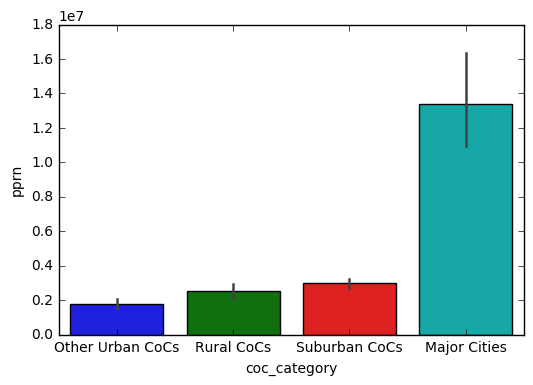

In [39]:
# Distribution of Premliminary Pro Rata Need by COC Category
sns.barplot(x ='coc_category', y = 'pprn', data=pit_ard_merged)
plt.show()

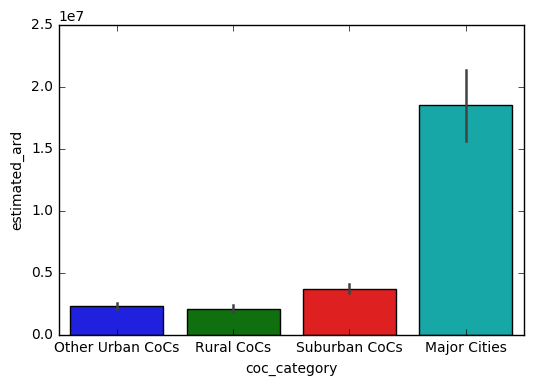

In [40]:
# Distribution of Estimated Annual Reward Demand
sns.barplot(x ='coc_category', y = 'estimated_ard', data=pit_ard_merged)
plt.show()

Data looks as expected with funds being scewed towards major cities

In [41]:
## Look at Distribution of Funds by Category for Top 5 and Bottom 5 States by total PPRN and ARD

In [42]:
## Top 5 States
top_5_states = pit_ard_merged.groupby('State')['estimated_ard'].sum().sort_values(ascending = False).index[0:6].tolist()
top_5_states

['CA', 'NY', 'IL', 'PA', 'OH', 'TX']

In [43]:
## Bottom 5 States
territories = ['GU', 'VI', 'MP'] # Account for Territories
bottom_5_states = pit_ard_merged.query("State not in {}".format(territories)).groupby('State')['estimated_ard'].sum().sort_values().index[0:6].tolist()
bottom_5_states

['WY', 'SD', 'ND', 'MT', 'AK', 'ID']

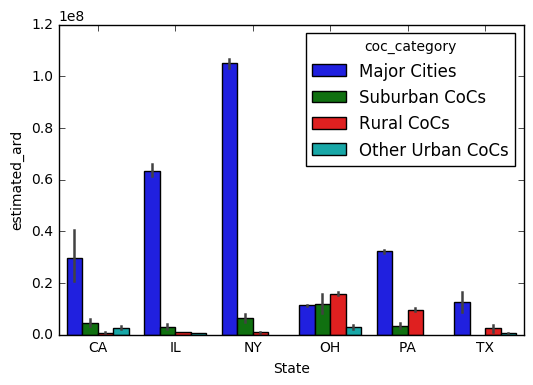

In [44]:
## Dist of Estimated ARD for Top 5 States, Breakdown by COC Category
sns.barplot(x ='State', y = 'estimated_ard', hue = 'coc_category', data=pit_ard_merged.query("State in {}".format(top_5_states)))
plt.show()

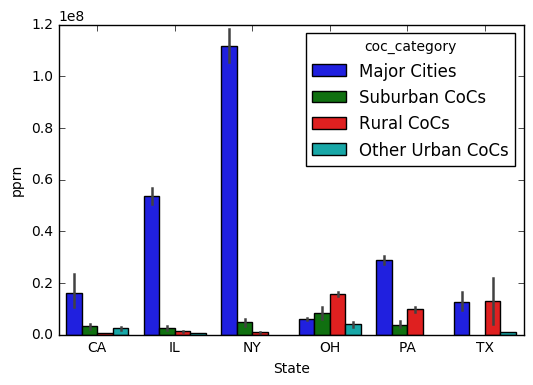

In [45]:
## Dist of Preliminary Pro Rata Need for Top 5 States, Breakdown by COC Category
sns.barplot(x ='State', y = 'pprn', hue = 'coc_category', data=pit_ard_merged.query("State in {}".format(top_5_states)))
plt.show()

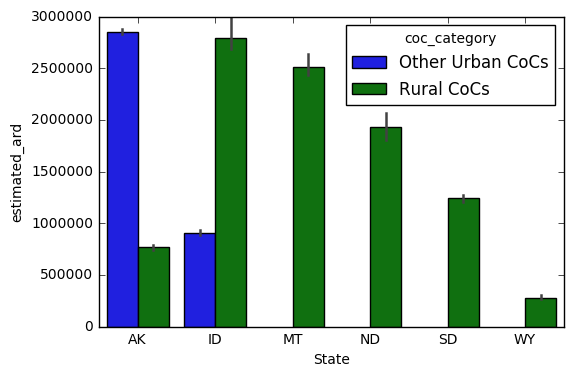

In [46]:
## Dist of Estimated ARD for Bottom 5 States, Breakdown by COC Category
sns.barplot(x ='State', y = 'estimated_ard', hue = 'coc_category', data=pit_ard_merged.query("State in {}".format(bottom_5_states)))
plt.show()

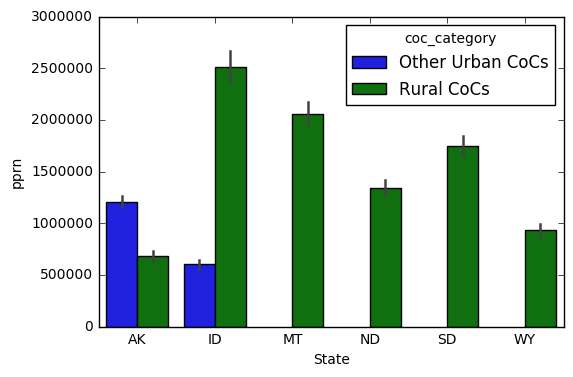

In [47]:
## Dist of Preliminary Pro Rata Need for Bottom 5 States, Breakdown by COC Category
sns.barplot(x ='State', y = 'pprn', hue = 'coc_category', data=pit_ard_merged.query("State in {}".format(bottom_5_states)))
plt.show()

 As Expected Funds in the Bottom 5 States* go to COCs in rural areas, and the ones in the Top 5 States* go to COCS in urban areas

*By Total ARD

In [48]:
# Save CSVs 
pit_ard_merged.to_csv("pit_ard_merged.csv", index=False)